In [13]:
# Import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Read the file
file_path="C:\\Users\\pc\\Documents\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [11]:
# continent column value counts
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [13]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [ ]:
# QN: Out of all the asian applicants how many got visa
#     out of all europe applicants how many got visa

In [25]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1&con2
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [29]:
len(visa_df[con])

11012

In [5]:
# certified data
N=visa_df['continent'].value_counts().keys()
certified_count=[]
for i in N:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con=con1&con2
    certified_count.append(len(visa_df[con]))

N,certified_count
pd.DataFrame(zip(N,certified_count),
            columns=['continent','certified_count'],
            index=[1,2,3,4,5,6])
    
    

,continent,certified_count
1,Asia,11012
2,Europe,2957
3,North America,2037
4,South America,493
5,Africa,397
6,Oceania,122


In [7]:

# denied data
N=visa_df['continent'].value_counts().keys()
denied_count=[]
for i in N:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Denied'
    denied_count.append(len(visa_df[con1&con2]))

N,denied_count
pd.DataFrame(zip(N,denied_count),
            columns=['continent','denied_count'],
            index=[1,2,3,4,5,6])

,continent,denied_count
1,Asia,5849
2,Europe,775
3,North America,1255
4,South America,359
5,Africa,154
6,Oceania,70


In [9]:
# Both denied and certified data

N=visa_df['continent'].value_counts().keys()
certified_count=[]
denied_count=[]
for i in N:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certified_count.append(len(visa_df[con1&con2]))
    denied_count.append(len(visa_df[con1&con3]))

N,certified_count
pd.DataFrame(zip(N,certified_count,denied_count),
            columns=['continent','certified_count','Denied_count'],
            index=[1,2,3,4,5,6])

,continent,certified_count,Denied_count
1,Asia,11012,5849
2,Europe,2957,775
3,North America,2037,1255
4,South America,493,359
5,Africa,397,154
6,Oceania,122,70


## Pd.crosstab

In [11]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

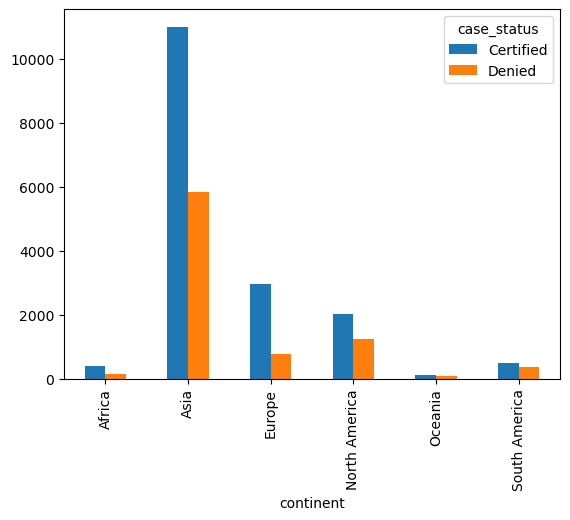

In [79]:
result1.plot(kind='bar')

In [90]:
# continent,Education,case_status

col1=visa_df['continent']  # index
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
col=[col2,col3]  # values
result2=pd.crosstab(col1,col)
result2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [88]:
col1=visa_df['continent'] 
col2=visa_df['case_status']   # index
col3=visa_df['education_of_employee']
col=[col1,col3]  # values
pd.crosstab(col1,col)

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                       143        54          66      288          0   
Asia                           0         0           0        0       7168   
Europe                         0         0           0        0          0   
North America                  0         0           0        0          0   
Oceania                        0         0           0        0          0   
South America                  0         0           0        0          0   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
continent                                                                   
Africa                        0           0        0          0         0   
Asia                        923        2290     6480          0         0   
Europe                        0           0        0       1299       846   
North America                 0           0        0          0         0   
Oceania                       0           0        0          0         0   
South America                 0           0        0          0         0   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
continent              ...                                               
Africa                 ...             0        0          0         0   
Asia                   ...             0        0          0         0   
Europe                 ...             0        0          0         0   
North America          ...           401     1408          0         0   
Oceania                ...             0        0         66        22   
South America          ...             0        0          0         0   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
continent                                                            
Africa                          0        0             0         0   
Asia                            0        0             0         0   
Europe                          0        0             0         0   
North America                   0        0             0         0   
Oceania                        36       68             0         0   
South America                   0        0           333        89   

continent                                   
education_of_employee High School Master's  
continent                                   
Africa                          0        0  
Asia                            0        0  
Europe                          0        0  
North America                   0        0  
Oceania                         0        0  
South America                 137      293  

[6 rows x 24 columns]

<Axes: xlabel='continent'>

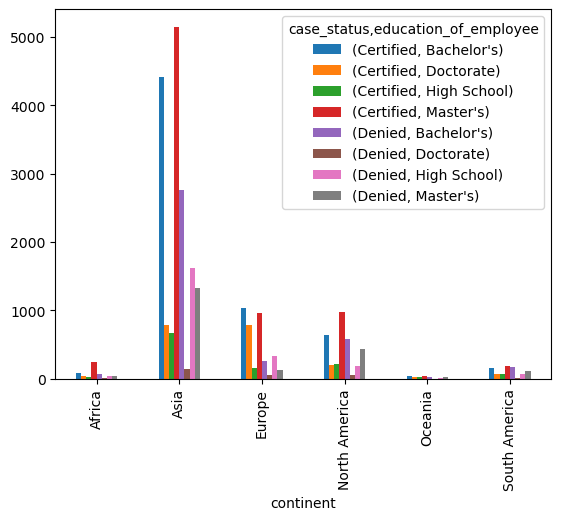

In [92]:
result2.plot(kind='bar')

## Numerical vs Numerical

$ plt.scatter $

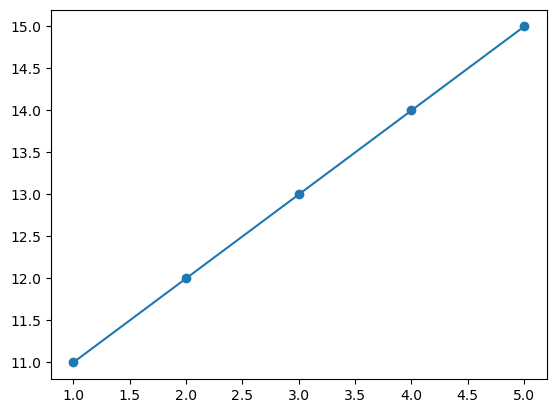

In [104]:
x=[1,2,3,4,5]
y=[11,12,13,14,15]

# (1,11),(2,12),(3,13),(4,14),(5,15)
plt.scatter(x,y)
plt.plot(x,y)

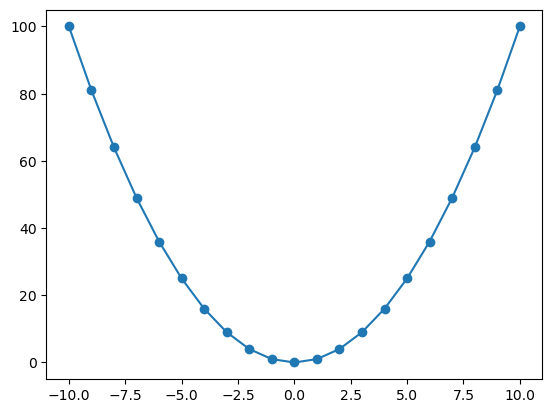

In [102]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)

- scatter plot only for Numerical analysis

- scatter plot provides an idea, that both variables are related or not

- positive relation:

               - Increase in the curve 

- negative relation:

                - Decrease in the curve

- no relation:

                - Neither increase nor decrease

In [17]:
dtypes=dict(visa_df.dtypes)
num_column=[i for i in dtypes if dtypes[i]!='O']
num_column

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

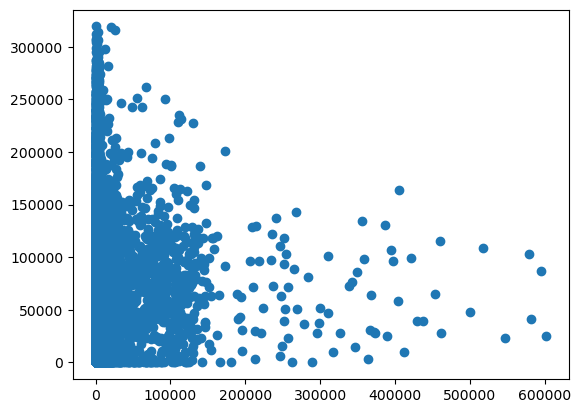

In [19]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

- Here In graph there is no relation

In [ ]:
# Now to prove that there is no relataion we need concept of correlation


## co-variance matrix

In [ ]:
- how many numerical variables are there? : 3

-                     no_of_employees   yr_of_estab    prevailing_wage


- no _of_ employee    var                cov              cov

- yr                  cov                var              cov 

- age                 cov                cov               var

## correlation coefficient

- Denoted with r

- r ranges from -1 to 1

- positive relation range=(0,1]

- negative relation range=[-1,0]

- no relation =0

<img src="https://www.stonex.com/en/-/media/project/gain-capital/stonex/stonex-main/features/glossary/correlation-coefficient.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 345px; height: 356px; margin: 0px; width: 346px;" alt="What is the correlation coefficient? Definition and examples | StoneX" jsname="kn3ccd" aria-hidden="false">

## corr

In [5]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


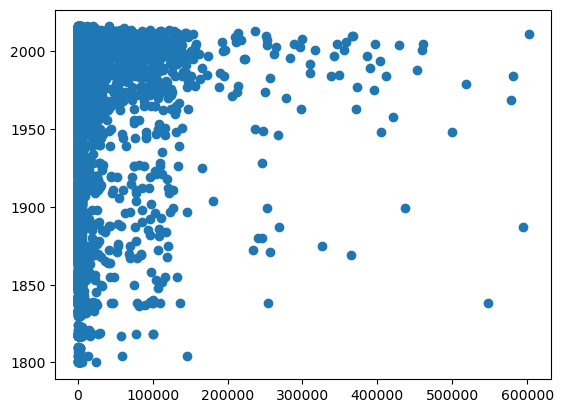

In [7]:
plt.scatter(visa_df['no_of_employees'],visa_df['yr_of_estab'])

In [17]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
# matrix
# showing values in the matrix
# showing values in a picture: Heatmap

<Axes: >

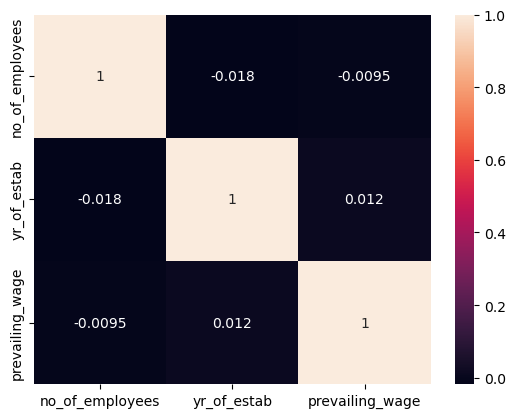

In [21]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,
           annot=True)

In [27]:
file_path1="C:\\Users\\pc\\Documents\\winequality_red.csv"
wine_df=pd.read_csv(file_path1)
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
J=wine_df.corr(numeric_only=True)
J

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

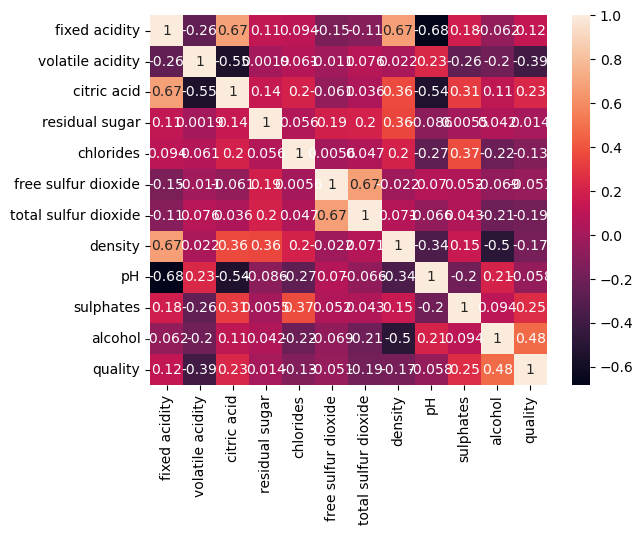

In [35]:
sns.heatmap(J,annot=True)

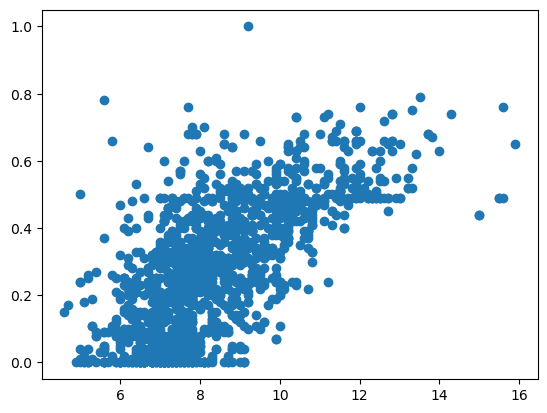

In [43]:
plt.scatter(wine_df['fixed acidity'],wine_df['citric acid'])